A1: Linear Regression model trained with single feature 'Days_Indoors'
Coefficient: [0.00122277]
Intercept: 0.5022245924883074


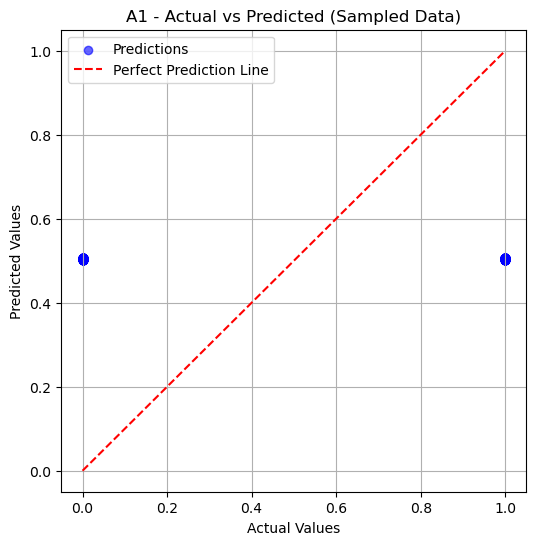

In [4]:
#A1. If your project deals with a regression problem, please use one attribute of your dataset 
#(X_train) along with the target values (y_train) for training a linear regression model. Sample code 
#suggested below. 
#from sklearn.linear_model import LinearRegression 
#reg = LinearRegression().fit(X_train, y_train) 
#y_train_pred = reg.predict(X_train) 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# -------- A1 Function --------
def train_single_feature_regression(file_path, feature, target):
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Encode categorical columns
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    
    # Select feature and target
    X = df[[feature]]
    y = df[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    reg = LinearRegression().fit(X_train, y_train)
    
    return reg, X_train, X_test, y_train, y_test

# -------- Main Section --------
if __name__ == "__main__":
    # Train the model
    model, X_train, X_test, y_train, y_test = train_single_feature_regression(
        r"C:\Users\koppe\Desktop\Mental Health Dataset.csv",  # Your dataset path
        feature="Days_Indoors",
        target="treatment"
    )
    
    # Predict on test set
    y_pred = model.predict(X_test)
    
    # Print model parameters
    print("A1: Linear Regression model trained with single feature 'Days_Indoors'")
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)
    
    # Sample a smaller portion for better visualization
    sample_idx = np.random.choice(len(y_test), size=300, replace=False)
    y_test_sample = np.array(y_test)[sample_idx]
    y_pred_sample = np.array(y_pred)[sample_idx]
    
    # Scatter plot of Actual vs Predicted
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test_sample, y_pred_sample, alpha=0.6, color='blue', label="Predictions")
    plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")  # 45° line
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("A1 - Actual vs Predicted (Sampled Data)")
    plt.legend()
    plt.grid(True)
    plt.show()


A2: Linear Regression with Single Feature 'Days_Indoors'
Coefficient: [0.00122277]
Intercept: 0.5022245924883074

Train Metrics - MSE: 0.249976, RMSE: 0.499976, MAPE: 1125789850097225.250000, R²: 0.000012
Test  Metrics - MSE: 0.249961, RMSE: 0.499961, MAPE: 1122994127185400.750000, R²: 0.000021


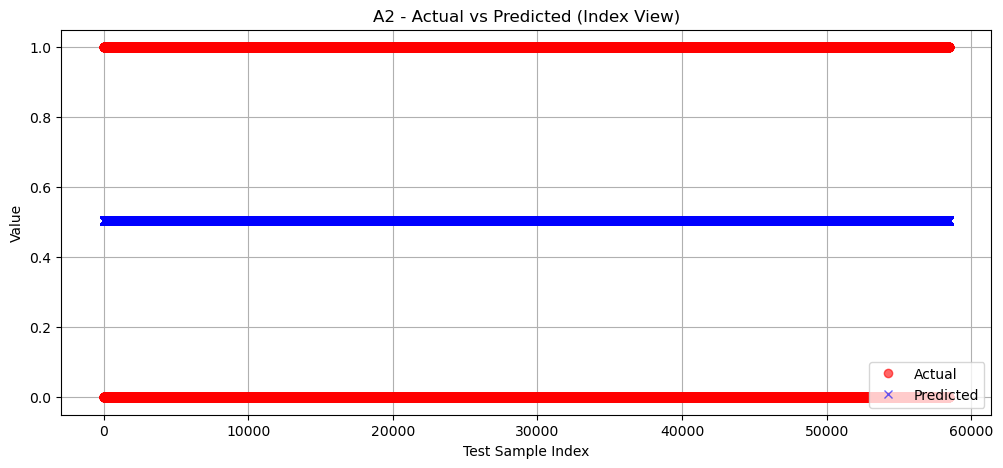

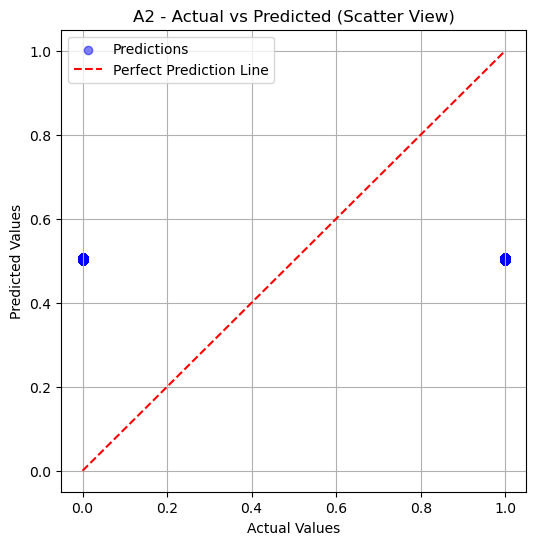

In [5]:
#A2. Calculate MSE, RMSE, MAPE and R2 scores for prediction made by the trained model in A1.  
#Perform prediction on the test data and compare the metric values between train and test set. 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np


def train_and_evaluate_single_feature(file_path, feature, target):
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Encode categorical columns
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    
    # Select feature and target
    X = df[[feature]]
    y = df[target]
    
    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Train Linear Regression model
    reg = LinearRegression().fit(X_train, y_train)
    
    # Predictions
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    # Metrics
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return reg, X_test, y_test, y_test_pred, (mse_train, rmse_train, mape_train, r2_train), (mse_test, rmse_test, mape_test, r2_test)

# -------- Main Section --------
if __name__ == "__main__":
    model, X_test, y_test, y_pred, train_metrics, test_metrics = train_and_evaluate_single_feature(
        r"C:\Users\koppe\Desktop\Mental Health Dataset.csv",  # Your dataset path
        feature="Days_Indoors",
        target="treatment"
    )
    
    # Print metrics
    print("A2: Linear Regression with Single Feature 'Days_Indoors'")
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)
    print("\nTrain Metrics - MSE: {:.6f}, RMSE: {:.6f}, MAPE: {:.6f}, R²: {:.6f}".format(*train_metrics))
    print("Test  Metrics - MSE: {:.6f}, RMSE: {:.6f}, MAPE: {:.6f}, R²: {:.6f}".format(*test_metrics))
    
    # -------- Plot 1: Index vs Values --------
    plt.figure(figsize=(12, 5))
    plt.plot(range(len(y_test)), y_test, 'o', label='Actual', color='red', alpha=0.6)
    plt.plot(range(len(y_pred)), y_pred, 'x', label='Predicted', color='blue', alpha=0.6)
    plt.xlabel("Test Sample Index")
    plt.ylabel("Value")
    plt.title("A2 - Actual vs Predicted (Index View)")
    plt.legend()
    plt.grid(True)
    plt.show()
    
    # -------- Plot 2: Actual vs Predicted Scatter --------
    plt.figure(figsize=(6, 6))
    plt.scatter(y_test, y_pred, alpha=0.5, color='blue', label="Predictions")
    plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("A2 - Actual vs Predicted (Scatter View)")
    plt.legend()
    plt.grid(True)
    plt.show()


A2 - Single Feature Metrics
Train: (0.24997556249344866, 0.4999755618962277, 1125789850097225.2, 1.2069221177801737e-05)
Test : (0.24996073026452595, 0.4999607287222927, 1122994127185400.8, 2.064523195222101e-05)

A3 - All Features Metrics
Train: (0.2009090131634557, 0.4482287509335559, 904813756818312.2, 0.19629508443088484)
Test : (0.20134600050157941, 0.4487159463419808, 903057686975316.0, 0.19450609920357342)

=== A2 vs A3 Comparison Table ===
         Metric  A2 - Single Feature  A3 - All Features
0   MSE (Train)         2.499756e-01       2.009090e-01
1  RMSE (Train)         4.999756e-01       4.482288e-01
2  MAPE (Train)         1.125790e+15       9.048138e+14
3    R² (Train)         1.206922e-05       1.962951e-01
4    MSE (Test)         2.499607e-01       2.013460e-01
5   RMSE (Test)         4.999607e-01       4.487159e-01
6   MAPE (Test)         1.122994e+15       9.030577e+14
7     R² (Test)         2.064523e-05       1.945061e-01


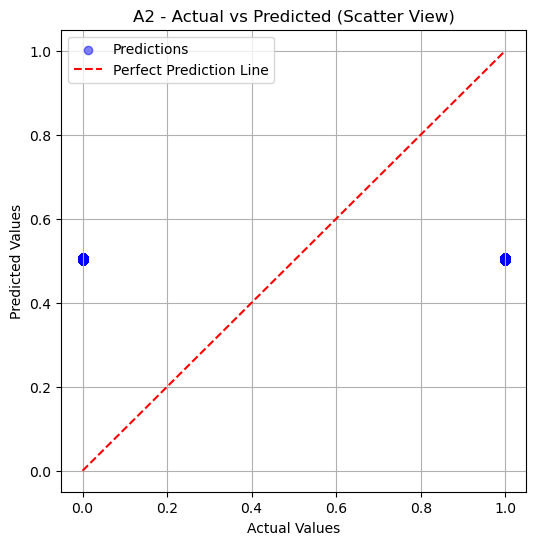

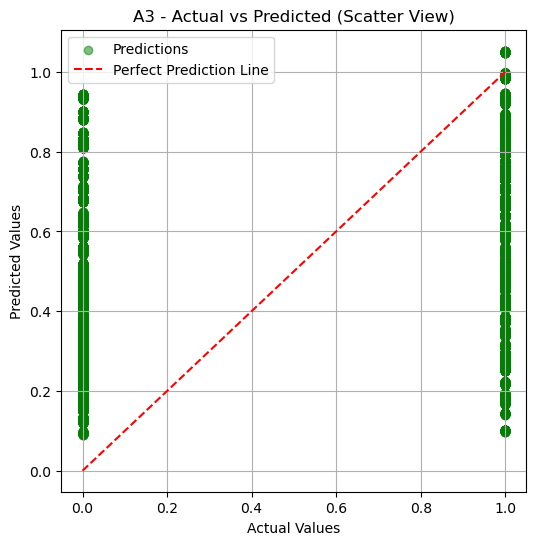

In [6]:
#A3. Repeat the exercises A1 and A2 with more than one attribute or all attributes. 

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

# -------- Helper Function: Train and Evaluate --------
def train_and_evaluate(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_train_pred = reg.predict(X_train)
    y_test_pred = reg.predict(X_test)
    
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    mape_train = mean_absolute_percentage_error(y_train, y_train_pred)
    r2_train = r2_score(y_train, y_train_pred)
    
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    mape_test = mean_absolute_percentage_error(y_test, y_test_pred)
    r2_test = r2_score(y_test, y_test_pred)
    
    return reg, X_test, y_test, y_test_pred, (mse_train, rmse_train, mape_train, r2_train), (mse_test, rmse_test, mape_test, r2_test)

# -------- Data Preprocessing --------
file_path = r"C:\Users\koppe\Desktop\Mental Health Dataset.csv"
df = pd.read_csv(file_path)
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))

y = df["treatment"]

# -------- A2: Single Feature --------
X_single = df[["Days_Indoors"]]
model_a2, X_test_a2, y_test_a2, y_pred_a2, train_metrics_a2, test_metrics_a2 = train_and_evaluate(X_single, y)

# -------- A3: All Features --------
X_all = df.drop(columns=["treatment"])
model_a3, X_test_a3, y_test_a3, y_pred_a3, train_metrics_a3, test_metrics_a3 = train_and_evaluate(X_all, y)

# -------- Print Metrics --------
print("A2 - Single Feature Metrics")
print("Train:", train_metrics_a2)
print("Test :", test_metrics_a2)

print("\nA3 - All Features Metrics")
print("Train:", train_metrics_a3)
print("Test :", test_metrics_a3)

# -------- Comparison Table --------
comparison_df = pd.DataFrame({
    "Metric": ["MSE (Train)", "RMSE (Train)", "MAPE (Train)", "R² (Train)", "MSE (Test)", "RMSE (Test)", "MAPE (Test)", "R² (Test)"],
    "A2 - Single Feature": [*train_metrics_a2, *test_metrics_a2],
    "A3 - All Features": [*train_metrics_a3, *test_metrics_a3]
})

print("\n=== A2 vs A3 Comparison Table ===")
print(comparison_df)

# -------- Plot A2: Scatter View --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test_a2, y_pred_a2, alpha=0.5, color='blue', label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("A2 - Actual vs Predicted (Scatter View)")
plt.legend()
plt.grid(True)
plt.show()

# -------- Plot A3: Scatter View --------
plt.figure(figsize=(6, 6))
plt.scatter(y_test_a3, y_pred_a3, alpha=0.5, color='green', label="Predictions")
plt.plot([0, 1], [0, 1], 'r--', label="Perfect Prediction Line")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("A3 - Actual vs Predicted (Scatter View)")
plt.legend()
plt.grid(True)
plt.show()


A4: K-Means Clustering with k=2
Cluster Labels: [0 0 0 ... 0 1 0]
Cluster Centers:
 [[1.31810240e+02 8.19713804e-01 2.81543822e+01 2.05102673e+00
  1.49955359e-01 3.67962899e-01 1.96336367e+00 9.98945985e-01
  1.04909851e+00 9.91716681e-01 1.03279847e+00 4.72186399e-01
  9.45817420e-01 9.59699420e-01 8.41463717e-01 9.02807400e-01]
 [4.26761192e+02 8.21202966e-01 2.93693277e+01 2.05090177e+00
  1.17382282e-01 4.28636821e-01 1.96324270e+00 9.98764076e-01
  1.04911654e+00 9.91806280e-01 1.03286643e+00 4.72077268e-01
  9.45756660e-01 9.59672251e-01 8.67405170e-01 9.42796546e-01]]


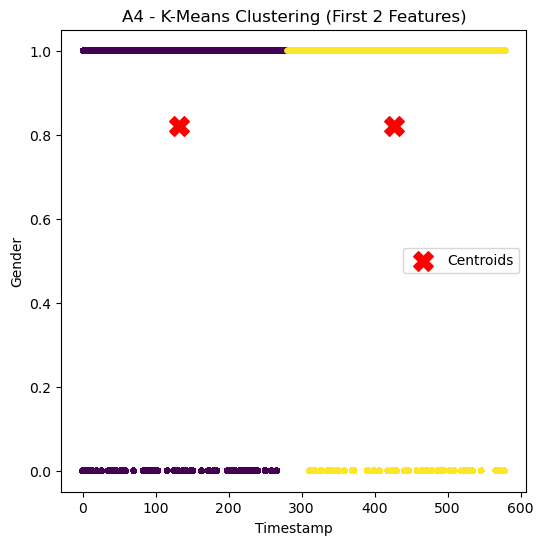

In [7]:
#A4. Perform k-means clustering on your data. Please remove / ignore the target variable for 
#performing clustering. Sample code suggested below. 
#from sklearn.cluster import KMeans 
#kmeans = KMeans(n_clusters=2, random_state=0, 
#n_init="auto").fit(X_train)  
#kmeans.labels_ 
#kmeans.cluster_centers_ 
#(P.S.: Above code uses k = 2.)
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# -------- A4 Function: Perform K-Means --------
def perform_kmeans(file_path, target, k=2):
    # Load dataset
    df = pd.read_csv(file_path)
    
    # Encode categorical columns
    for col in df.columns:
        if df[col].dtype == 'object':
            le = LabelEncoder()
            df[col] = le.fit_transform(df[col].astype(str))
    
    # Remove target column for clustering
    X = df.drop(columns=[target])
    
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X)
    
    return kmeans, X

# -------- Main Section --------
if __name__ == "__main__":
    file_path = r"C:\Users\koppe\Desktop\Mental Health Dataset.csv"  # Your dataset path
    
    # Run A4
    kmeans_model, X_data = perform_kmeans(file_path, target="treatment", k=2)
    
    # Print results
    print("A4: K-Means Clustering with k=2")
    print("Cluster Labels:", kmeans_model.labels_)
    print("Cluster Centers:\n", kmeans_model.cluster_centers_)
    
    # Optional: 2D Scatter Plot of first two features
    plt.figure(figsize=(6, 6))
    plt.scatter(X_data.iloc[:, 0], X_data.iloc[:, 1], c=kmeans_model.labels_, cmap="viridis", s=10)
    plt.scatter(kmeans_model.cluster_centers_[:, 0], kmeans_model.cluster_centers_[:, 1], 
                c="red", marker="X", s=200, label="Centroids")
    plt.xlabel(X_data.columns[0])
    plt.ylabel(X_data.columns[1])
    plt.title("A4 - K-Means Clustering (First 2 Features)")
    plt.legend()
    plt.show()
